In [86]:
import pandas as pd
import numpy as np
import pickle as pk
import matplotlib.pyplot as plt

/Users/duanpeilin/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [77]:
games_df = pd.read_csv('Games.csv')

In [81]:
teams = pk.load(open('name_pref.pickle'))
improv_Dict = {}
for name, pref in teams:
#     improv_Dict[name] = {'W':0, 'WorstPos':0, 'BestPos':1000}
    improv_Dict[name] = {'W':0, 'Pos':[]}

In [82]:
improv_df = pd.DataFrame(improv_Dict).T
# improv_df = improv_df.reindex(columns=['W', 'BestPos', 'WorstPos'])

In [83]:
date_df = games_df.sort_values('date')

In [84]:
for idx, row in date_df.iterrows():
    home_team = row['home_team']
    visit_team = row['visit_team']
    home_score = int(row['home_score'].split()[0]) # possible 'OT'
    visit_score = int(row['visit_score'].split()[0]) 
    if home_score > visit_score:
        improv_df.ix[home_team]['W'] += 1
    else:
        improv_df.ix[visit_team]['W'] += 1
    cur_rank = improv_df['W'].rank(method='min', ascending=False)
    i = 0
    for pos in improv_df['Pos'].values:
        pos.append(cur_rank[i])
        i += 1

In [145]:
team_name = []
improvement = []
for idx, row in improv_df.iterrows():
    team_name.append(idx)
    pos = row['Pos']
    worstPosInd = np.argmax(pos)
#     later_pos = pos[worstPosInd:]
#     bestPosInd = np.argmin(later_pos)
#     improvement.append(pos[worstPosInd] - later_pos[bestPosInd])
    improvement.append(pos[worstPosInd] - pos[-1])

In [152]:
team_improv = pd.Series(improvement, index=team_name)

In [158]:
sorted_improv = team_improv.sort_values(ascending=False)

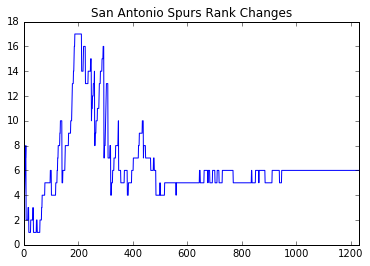

In [157]:
%matplotlib inline
name = 'San Antonio Spurs'
data = improv_df.ix[name]['Pos']
plt.plot(np.array(worriers))
plt.xlim(0, len(data))
plt.title(name + ' ' + 'Rank Changes')

In [186]:
pd.Series(data = sorted_improv.index.values).to_csv('Improve.csv')

In [181]:
f = open('file.txt', 'w')
for t in sorted_improv.index.get_values():
    f.write(t)
    f.write('\n')